#  ------------------------- SPLIT  -- APPLY -- COMBINE  ------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Where is the Data??

In [2]:
sales_dict={'colour':['Yellow','Black','Blue','Red','Yellow','Black','Blue',
                      'Red','Yellow','Black','Blue','Red','Yellow','Black','Blue','Red','Blue','Red'],
           'sales':[100000,150000,80000,90000,200000,145000,120000,
                    300000,250000,200000,160000,90000,90100,150000,142000,130000,400000,350000],
          'transactions':[100,150,820,920,230,120,70,250,250,110,130,860,980,300,150,170,230,280],
           'product':['type A','type A','type A','type A','type A','type A','type A',
                      'type A','type A','type B','type B','type B','type B','type B','type B','type B','type B','type B']}

In [3]:
data_sales=pd.DataFrame(sales_dict)

In [4]:
data_sales

,colour,sales,transactions,product
0,Yellow,100000,100,type A
1,Black,150000,150,type A
2,Blue,80000,820,type A
3,Red,90000,920,type A
4,Yellow,200000,230,type A
5,Black,145000,120,type A
6,Blue,120000,70,type A
7,Red,300000,250,type A
8,Yellow,250000,250,type A
9,Black,200000,110,type B


C:\Users\w38364\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


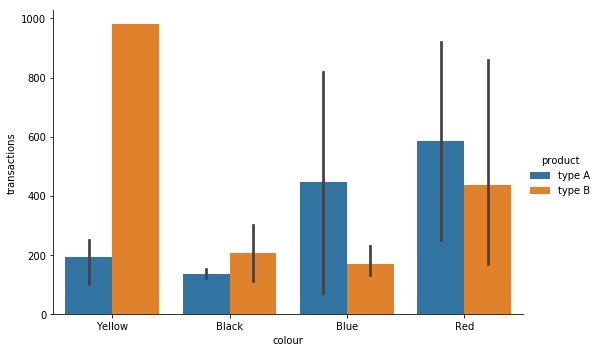

In [5]:
sns.catplot(x="colour", y="transactions", kind="bar", hue="product", aspect=1.5, data=data_sales)

C:\Users\w38364\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


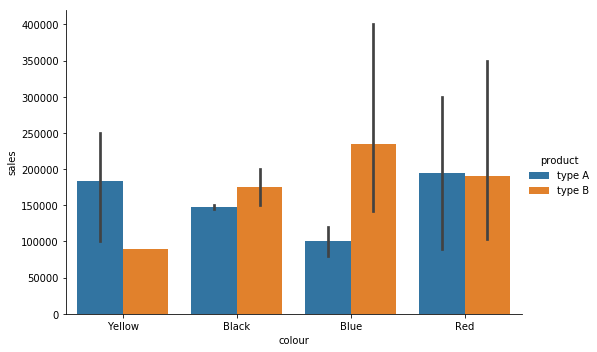

In [6]:
sns.catplot(x="colour", y="sales", kind="bar", hue="product", aspect=1.5, data=data_sales)

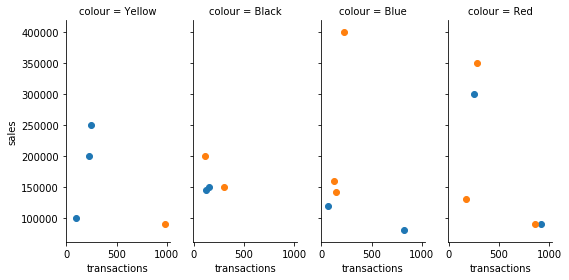

In [7]:
graph = sns.FacetGrid(data_sales, col="colour", height=4, hue="product",aspect=.5)
graph.map(plt.scatter, "transactions", "sales");

# Split: Create an Object.

In [8]:
# Split: Groupby the column 'colour'

data_gby = data_sales.groupby('colour')
print(type(data_gby))

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


In [9]:
#  lets check the names of the groups

data_gby.groups

{'Black': Int64Index([1, 5, 9, 13], dtype='int64'),
 'Blue': Int64Index([2, 6, 10, 14, 16], dtype='int64'),
 'Red': Int64Index([3, 7, 11, 15, 17], dtype='int64'),
 'Yellow': Int64Index([0, 4, 8, 12], dtype='int64')}

In [10]:
### 'key' is the name of the group and 'value' is the segmented rows from the original DataFrame.

for key, value in data_gby: 
    print('GroupName: ',key)
    print(value)
    print('-------------------------------------------')

GroupName:  Black
   colour   sales  transactions product
1   Black  150000           150  type A
5   Black  145000           120  type A
9   Black  200000           110  type B
13  Black  150000           300  type B
-------------------------------------------
GroupName:  Blue
   colour   sales  transactions product
2    Blue   80000           820  type A
6    Blue  120000            70  type A
10   Blue  160000           130  type B
14   Blue  142000           150  type B
16   Blue  400000           230  type B
-------------------------------------------
GroupName:  Red
   colour   sales  transactions product
3     Red   90000           920  type A
7     Red  300000           250  type A
11    Red   90000           860  type B
15    Red  130000           170  type B
17    Red  350000           280  type B
-------------------------------------------
GroupName:  Yellow
    colour   sales  transactions product
0   Yellow  100000           100  type A
4   Yellow  200000           230  ty

# APPLY: Apply a function over the Object.

# Aggregation

### Dual axis chart with the grouping by single column

In [11]:
data_colour=data_sales.groupby('colour').sum()

In [12]:
print(data_colour)

         sales  transactions
colour                      
Black   645000           680
Blue    902000          1400
Red     960000          2480
Yellow  640100          1560


In [13]:
def create_dual(data_1,data_2,data_x):
    fig, ax1 = plt.subplots(figsize=(8, 8))

    color = 'tab:red'
    ax1.set_ylabel('sales', color=color)
    ax1.bar(data_x, data_1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.tick_params(axis='x', labelrotation=90.0)

    ax2 = ax1.twinx()                            # instantiate a second axes that shares the same x-axis
    
    
    color = 'tab:cyan'
    ax2.set_ylabel('transactions', color=color)  # we already handled the x-label with ax1
    ax2.plot(data_x, data_2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    #fig.tight_layout()                          # otherwise the right y-label is slightly clipped
    plt.show()

In [14]:
y_1 = data_colour['transactions']
y_2 = data_colour['sales']
data_x= data_colour.index

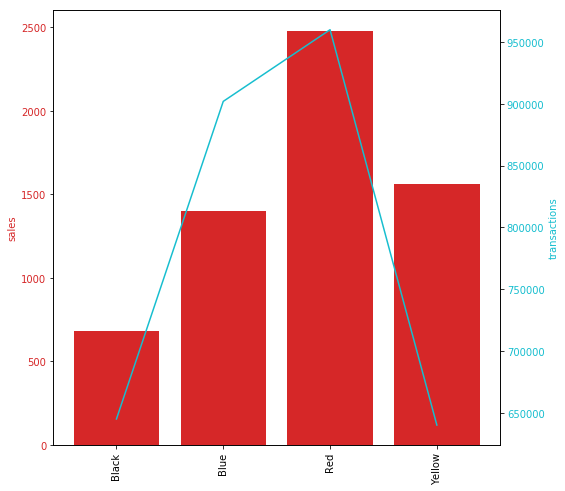

In [15]:
create_dual(y_1,y_2,data_x)    ## Function call

## GroupBy multiple columns

###  Groupby two columns and aggregation

In [16]:
data_prod_colour_index=data_sales.groupby(['product','colour'], as_index=True).sum()         # Note: as_index=True

In [17]:
data_prod_colour_index

sales  transactions
product colour                      
type A  Black   295000           270
        Blue    200000           890
        Red     390000          1170
        Yellow  550000           580
type B  Black   350000           410
        Blue    702000           510
        Red     570000          1310
        Yellow   90100           980

In [18]:
data_prod_colour_Noindex = data_sales.groupby(['product','colour'],as_index=False).sum()

data_prod_colour_Noindex

,product,colour,sales,transactions
0,type A,Black,295000,270
1,type A,Blue,200000,890
2,type A,Red,390000,1170
3,type A,Yellow,550000,580
4,type B,Black,350000,410
5,type B,Blue,702000,510
6,type B,Red,570000,1310
7,type B,Yellow,90100,980


### Concat Categorical Columns and then GroupBy the Concatenated Column

In [19]:
data_sales['product*colour']=data_sales['product']+'-'+data_sales['colour']

In [20]:
data_concat= data_sales.groupby('product*colour',as_index=True).sum()

In [21]:
data_concat

,sales,transactions
product*colour,,
type A-Black,295000,270
type A-Blue,200000,890
type A-Red,390000,1170
type A-Yellow,550000,580
type B-Black,350000,410
type B-Blue,702000,510
type B-Red,570000,1310
type B-Yellow,90100,980


In [22]:
list(data_concat.index)

['type A-Black',
 'type A-Blue',
 'type A-Red',
 'type A-Yellow',
 'type B-Black',
 'type B-Blue',
 'type B-Red',
 'type B-Yellow']

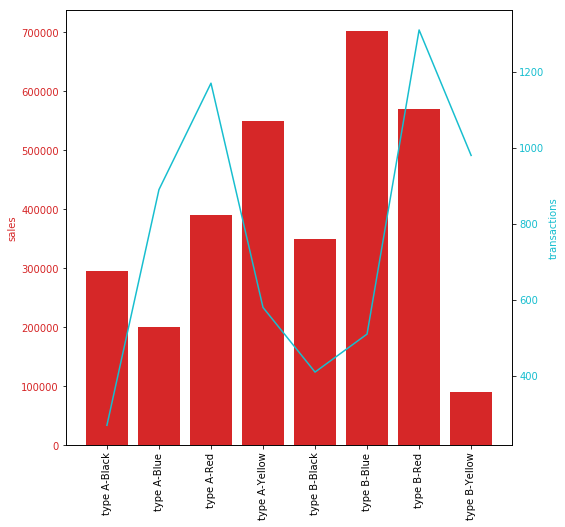

In [23]:
 create_dual(data_concat['sales'],data_concat['transactions'],data_concat.index)

In [24]:
## Custom Aggregation in GroupBy using Dictionaries. Without Groupby column as Index ('as_index=0').

In [25]:
data_prod_colour_agg_NoGpIndex = data_sales.groupby(['product','colour'], as_index=0).agg({'sales': 'sum', 'transactions':'median'})

In [26]:
data_prod_colour_agg_NoGpIndex

,product,colour,sales,transactions
0,type A,Black,295000,135
1,type A,Blue,200000,445
2,type A,Red,390000,585
3,type A,Yellow,550000,230
4,type B,Black,350000,205
5,type B,Blue,702000,150
6,type B,Red,570000,280
7,type B,Yellow,90100,980


In [27]:
data_sales.groupby(['product','colour'], as_index=True).agg({'sales': np.sum, 'transactions':[np.median,'count']})

sales transactions      
                   sum       median count
product colour                           
type A  Black   295000          135     2
        Blue    200000          445     2
        Red     390000          585     2
        Yellow  550000          230     3
type B  Black   350000          205     2
        Blue    702000          150     3
        Red     570000          280     3
        Yellow   90100          980     1

# Transformation

In [28]:
sales_trial=data_sales

In [29]:
sales_trial['RevPerTrans']=sales_trial['sales']/sales_trial['transactions']

In [30]:
sales_trial

,colour,sales,transactions,product,product*colour,RevPerTrans
0,Yellow,100000,100,type A,type A-Yellow,1000.000000
1,Black,150000,150,type A,type A-Black,1000.000000
2,Blue,80000,820,type A,type A-Blue,97.560976
3,Red,90000,920,type A,type A-Red,97.826087
4,Yellow,200000,230,type A,type A-Yellow,869.565217
5,Black,145000,120,type A,type A-Black,1208.333333
6,Blue,120000,70,type A,type A-Blue,1714.285714
7,Red,300000,250,type A,type A-Red,1200.000000
8,Yellow,250000,250,type A,type A-Yellow,1000.000000
9,Black,200000,110,type B,type B-Black,1818.181818


In [31]:
def standard(series):
    stdsd= (series - series.mean())/series.std()
    return(stdsd)

In [32]:
sales_trial.groupby('product')['sales'].transform(standard)

0    -0.782891
1    -0.124385
2    -1.046293
3    -0.914592
4     0.534122
5    -0.190235
6    -0.519488
7     1.851134
8     1.192628
9     0.088160
10   -0.272905
11   -0.904769
12   -0.903867
13   -0.363171
14   -0.435385
15   -0.543704
16    1.893486
17    1.442155
Name: sales, dtype: float64

In [33]:
### Apply the transform function (standard deviation:std()) on the sales column grouped by product column

### It is to be noted that the output has the same number of rows as in input

In [34]:
data_sales['sales_product_std'] = data_sales.groupby('product',as_index=True)['sales'].transform('std')

In [35]:
data_sales.loc[:,['colour','product','sales','transactions', 'sales_product_std']]

,colour,product,sales,transactions,sales_product_std
0,Yellow,type A,100000,100,75929.426297
1,Black,type A,150000,150,75929.426297
2,Blue,type A,80000,820,75929.426297
3,Red,type A,90000,920,75929.426297
4,Yellow,type A,200000,230,75929.426297
5,Black,type A,145000,120,75929.426297
6,Blue,type A,120000,70,75929.426297
7,Red,type A,300000,250,75929.426297
8,Yellow,type A,250000,250,75929.426297
9,Black,type B,200000,110,110783.301991


In [36]:
## Using custom function to transform. Standardization of column 'sales' grouped by column 'colour'

data_sales['sales_stdzed_colour'] = data_sales.groupby('colour')['sales'].transform(lambda x: (x-x.mean())/x.std())

print(data_sales.loc[:,['colour', 'sales', 'sales_stdzed_colour']])

    colour   sales  sales_stdzed_colour
0   Yellow  100000            -0.770946
1    Black  150000            -0.433682
2     Blue   80000            -0.794706
3      Red   90000            -0.824083
4   Yellow  200000             0.513429
5    Black  145000            -0.626430
6     Blue  120000            -0.478090
7      Red  300000             0.872558
8   Yellow  250000             1.155617
9    Black  200000             1.493795
10    Blue  160000            -0.161474
11     Red   90000            -0.824083
12  Yellow   90100            -0.898099
13   Black  150000            -0.433682
14    Blue  142000            -0.303951
15     Red  130000            -0.500913
16    Blue  400000             1.738221
17     Red  350000             1.276520


In [37]:
## Calculation of Group level mean and its broadcasting on to the original data frame.

data_sales['X.mean'] = data_sales.groupby('colour')['sales'].transform('mean')  

In [38]:
## Calculation of Group level std dev and its broadcasting on to the original data frame.

data_sales['X.std'] = data_sales.groupby('colour')['sales'].transform('std')

In [39]:
## Simple row wise standardization based on X, X.mean , and X.std columns

data_sales['simple_stdzed'] = (data_sales['sales']-data_sales['X.mean'])/data_sales['X.std']

In [40]:
## Print both the transformed column and the column with simple calculation and see the difference between the two.
## Both the columns 'simple_stdzed', and 'sales_stdzed_colour' are exactly similar.
## Mean and Std Dev has been calculated based on groups thus we can see the values(X.mean,X.std) repeating for same colours.

print(data_sales.loc[:,['colour', 'sales','X.mean','X.std','simple_stdzed','sales_stdzed_colour']])

    colour   sales  X.mean          X.std  simple_stdzed  sales_stdzed_colour
0   Yellow  100000  160025   77858.862694      -0.770946            -0.770946
1    Black  150000  161250   25940.637360      -0.433682            -0.433682
2     Blue   80000  180400  126336.059777      -0.794706            -0.794706
3      Red   90000  192000  123773.987574      -0.824083            -0.824083
4   Yellow  200000  160025   77858.862694       0.513429             0.513429
5    Black  145000  161250   25940.637360      -0.626430            -0.626430
6     Blue  120000  180400  126336.059777      -0.478090            -0.478090
7      Red  300000  192000  123773.987574       0.872558             0.872558
8   Yellow  250000  160025   77858.862694       1.155617             1.155617
9    Black  200000  161250   25940.637360       1.493795             1.493795
10    Blue  160000  180400  126336.059777      -0.161474            -0.161474
11     Red   90000  192000  123773.987574      -0.824083        

In [41]:
sales_trial['pro_std_sales'] = sales_trial.groupby('product')['sales'].transform('std') 
## calculationg at the level of detail of Groupby and then broadcasting it on to the whole series.

In [42]:
sales_trial

,colour,sales,transactions,product,product*colour,RevPerTrans,sales_product_std,sales_stdzed_colour,X.mean,X.std,simple_stdzed,pro_std_sales
0,Yellow,100000,100,type A,type A-Yellow,1000.000000,75929.426297,-0.770946,160025,77858.862694,-0.770946,75929.426297
1,Black,150000,150,type A,type A-Black,1000.000000,75929.426297,-0.433682,161250,25940.637360,-0.433682,75929.426297
2,Blue,80000,820,type A,type A-Blue,97.560976,75929.426297,-0.794706,180400,126336.059777,-0.794706,75929.426297
3,Red,90000,920,type A,type A-Red,97.826087,75929.426297,-0.824083,192000,123773.987574,-0.824083,75929.426297
4,Yellow,200000,230,type A,type A-Yellow,869.565217,75929.426297,0.513429,160025,77858.862694,0.513429,75929.426297
5,Black,145000,120,type A,type A-Black,1208.333333,75929.426297,-0.626430,161250,25940.637360,-0.626430,75929.426297
6,Blue,120000,70,type A,type A-Blue,1714.285714,75929.426297,-0.478090,180400,126336.059777,-0.478090,75929.426297
7,Red,300000,250,type A,type A-Red,1200.000000,75929.426297,0.872558,192000,123773.987574,0.872558,75929.426297
8,Yellow,250000,250,type A,type A-Yellow,1000.000000,75929.426297,1.155617,160025,77858.862694,1.155617,75929.426297
9,Black,200000,110,type B,type B-Black,1818.181818,110783.301991,1.493795,161250,25940.637360,1.493795,110783.301991


# Filtering

In [43]:
grouped = data_sales.groupby('colour')

Blue_avg_transaction= grouped['transactions','sales'].mean().loc['Blue','transactions']
Black_avg_transaction= grouped['transactions','sales'].mean().loc['Black','transactions']
Yellow_avg_transaction= grouped['transactions','sales'].mean().loc['Yellow','transactions']
Red_avg_transaction= grouped['transactions','sales'].mean().loc['Red','transactions']

print('Blue_avg_transaction: ', Blue_avg_transaction)
print('Black_avg_transaction:', Black_avg_transaction)
print('Yellow_avg_transaction: ', Yellow_avg_transaction)
print('Red_avg_transaction:', Red_avg_transaction)

Blue_avg_transaction:  280
Black_avg_transaction: 170
Yellow_avg_transaction:  390
Red_avg_transaction: 496


In [44]:
## The output shows that 

filt_df = grouped.filter(lambda x: x['transactions'].mean() > Black_avg_transaction)

print(filt_df.iloc[:,[0,2]])

    colour  transactions
0   Yellow           100
2     Blue           820
3      Red           920
4   Yellow           230
6     Blue            70
7      Red           250
8   Yellow           250
10    Blue           130
11     Red           860
12  Yellow           980
14    Blue           150
15     Red           170
16    Blue           230
17     Red           280


# Combine: Combine the result to get a new Object

####  NOTE: when we apply the function (aggregation in our case) on one column in a GroupbyDataframe object then it gives a pandas seriese as an output; however, when we apply the function to more than one column then we get a data frame as an output. 

In [45]:
## Aggregation function mean() applied on only one column 'sales'. Also note as_index=True.
d1 = data_sales.groupby('colour',as_index=True)['sales'].mean() 

In [46]:
type(d1) ## The output is Pandas Series

pandas.core.series.Series

In [47]:
print(d1)

colour
Black     161250
Blue      180400
Red       192000
Yellow    160025
Name: sales, dtype: int64


In [48]:
## Aggregation function mean() applied on only two columns 
d2 = data_sales.groupby('colour',as_index=True).agg({'sales':np.mean, 'transactions': np.sum})

In [49]:
type(d2)     ## The Output is Pandas DataFrame

pandas.core.frame.DataFrame

In [50]:
print(d2)

         sales  transactions
colour                      
Black   161250           680
Blue    180400          1400
Red     192000          2480
Yellow  160025          1560


In [51]:
## Aggregation function mean() applied on only one column 'sales'.But now the result is dataframe bec parameter as_index=True 
d3 = data_sales.groupby('colour',as_index=False)['sales'].mean() 

In [52]:
type(d3)      ## The Output is Pandas DataFrame

pandas.core.frame.DataFrame

In [53]:
print(d3)

   colour   sales
0   Black  161250
1    Blue  180400
2     Red  192000
3  Yellow  160025


# Real World Application:Coeffecient of Variation.

In [54]:
## Define the function
def coeff_of_Variation(x):
    co_vn = x.std()/x.mean()
    return(co_vn)

In [55]:
## use the above defined function in the aggregation.
cvn= data_sales.groupby(['product','colour'])['sales'].agg([coeff_of_Variation,np.mean,np.std])

In [56]:
print(cvn)   ## The group 'type A- Black' has the lowest volatility

                coeff_of_Variation           mean            std
product colour                                                  
type A  Black             0.023970  147500.000000    3535.533906
        Blue              0.282843  100000.000000   28284.271247
        Red               0.761500  195000.000000  148492.424049
        Yellow            0.416598  183333.333333   76376.261583
type B  Black             0.202031  175000.000000   35355.339059
        Blue              0.615563  234000.000000  144041.660640
        Red               0.736842  190000.000000  140000.000000
        Yellow                 NaN   90100.000000            NaN
